# Рішення ОДУ однокрокові методи

## Імпорт пакетів

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.integrate import RK23

## Приклад 1.1

### y=t^2-y^2 ,  y0=1   t0=0<t<1

### Пряме використання залежностей

In [2]:
def raight_part (t, y): return t*t-y*y
def k1 (h): return raight_part (t, y)
def k2 (h): return raight_part (t+0.5*h, y+0.5*h*k1(h))    
def k3 (h): return raight_part (t+0.5*h, y+0.5*h*k2(h))
def k4 (h): return raight_part (t+h, y+h*k3(h))

In [3]:
# НАЙПРОСТІША ПРОГРАМА 
y0 = 1 # почткові умови
ts = 0.0 # початок відрізку інтегрування
tf = 1.0 # кінець відрізку інтегрування
n  = 10  # кількість кроків
h  = (tf-ts)/n  # довжина кроку
solution = np.zeros([2, n+1], dtype=np.float64) # масив результаті інтегрування
solution [0,0] = ts
solution [1,0] = y0
y = y0
t = ts
i = 0
while i < n:
    y += h*(k1(h)+2*k2(h)+2*k3(h)+k4(h))/6
    i +=1
    t += h
    solution [0,i] = t
    solution [1,i] = y
print (solution)

[[0.         0.1        0.2        0.3        0.4        0.5
  0.6        0.7        0.8        0.9        1.        ]
 [1.         0.90940971 0.83578553 0.77723817 0.73272762 0.70176904
  0.68423005 0.68017716 0.68974863 0.71304253 0.75001684]]


<function matplotlib.pyplot.show(*args, **kw)>

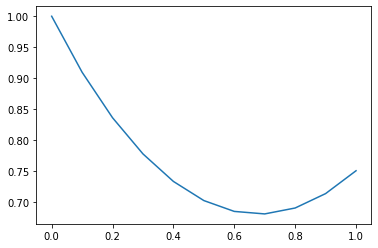

In [4]:
plt.plot(solution [0, ], solution [1, ])
plt.show

### y=t^2-y^2 ,  y0=1   t0=0<t<1

In [20]:
def ex1 (t, y): return t*t-y*y
ts=0.0
tf=1.0
y0=np.array([0])
y0[0]=1
sol = solve_ivp(ex1, [ts,tf], y0, t_eval=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
print(sol)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 20
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])
 t_events: None
        y: array([[1.        , 0.90939611, 0.83521741, 0.77633432, 0.73235914,
        0.70268455, 0.6864836 , 0.68273454, 0.69196735, 0.71498066,
        0.75170368]])


In [21]:
print(sol.t)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [22]:
print(sol.y)

[[1.         0.90939611 0.83521741 0.77633432 0.73235914 0.70268455
  0.6864836  0.68273454 0.69196735 0.71498066 0.75170368]]


<function matplotlib.pyplot.show(*args, **kw)>

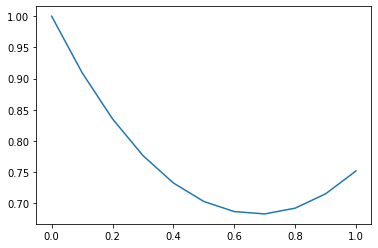

In [23]:
plt.plot(sol.t, sol.y[0])
plt.show

## Метод ФЕЛЬБЕРГА 4(5)

In [9]:
def raight_part (t, y): return t*t-y*y
def kk1 (h): return raight_part (t, y)
def kk2 (h): return raight_part (t+0.25*h, y+0.25*h*kk1(h))    
def kk3 (h): return raight_part (t+(3/8)*h, y+h*((3/32)*kk1(h)+(9/32)*kk2(h)))
def kk4 (h): return raight_part (t+(12/13)*h, y+h*((1932/2197)*kk1(h)-(7200/2197)*kk2(h) + (7296/2197)*kk3(h)))
def kk5 (h): return raight_part (t+h, y+h*((439/216)*kk1(h)-8*kk2(h) + (3680/513)*kk3(h)-(845/4104)*kk4(h)))
def kk6 (h): return raight_part (t+0.5*h, y+h*(-(8/27)*kk1(h)+2*kk2(h) - (3544/2565)*kk3(h)+(1859/4104)*kk4(h)-(11/40)*kk5(h)))

In [10]:
/# НАЙПРОСТІША ПРОГРАМА 
y0 = 1 # почткові умови
ts = 0.0 # початок відрізку інтегрування
tf = 1.0 # кінець відрізку інтегрування
n  = 10  # кількість кроків
h  = (tf-ts)/n  # довжина кроку
solution = np.zeros([3, n+1], dtype=np.float64) # масив результаті інтегрування
solution [0,0] = ts
solution [1,0] = y0
y = y0
t = ts
i = 0
while i < n:
    y += h*((25/216)*kk1(h)+(1408/2565)*kk3(h)+(2197/4104)*kk4(h)-(1/5)*kk5(h))
    i += 1
    t += h
    eps = h*((1/360)*kk1(h)-(128/4275)*kk3(h)-(2197/75240)*kk4(h)+(1/50)*kk5(h)+(2/5)*kk6(h))
    solution [0,i] = t
    solution [1,i] = y
    solution [2,i] = eps
print (solution)

[[ 0.          0.1         0.2         0.3         0.4         0.5
   0.6         0.7         0.8         0.9         1.        ]
 [ 1.          0.90940928  0.83578488  0.77723742  0.73272681  0.70176819
   0.68422915  0.68017619  0.68974756  0.7130413   0.75001538]
 [ 0.         -0.02675618 -0.02128348 -0.01618581 -0.01126213 -0.00638475
  -0.00148158  0.0034733   0.00846515  0.01344285  0.0183243 ]]


## Рішення системи рівняннь